# Localização utilizando o método de Geiger mais simples

 * Cartesiano (distância lineares por pitágoras)
 * Semi-espaço (velocidade constante)

In [4]:
%matplotlib inline

from __future__ import print_function, division
from matplotlib import pyplot as plt
import numpy as np
import pylab
import ipywidgets

pylab.rcParams['figure.figsize']  = [12, 6]

## Definindo as funções para calcular o problema direto (tt) e as derivadas em x (ttdx), y (ttdy) e z (ttdz). A derivada em DT/dt =1 

In [5]:
def ttdx(x,y,z,xo,yo,zo):
    d = np.sqrt((xo - x)*(xo - x) + (yo - y)*(yo - y) + (zo-z)*(zo-z))
    d[d < 1E-10] = 1E-10
    ddx = ((xo - x) / V) * (1/d)
    return ddx

def ttdy(x,y,z,xo,yo,zo):
    d = np.sqrt((xo - x)*(xo - x) + (yo - y)*(yo - y) + (zo-z)*(zo-z))
    d[d < 1E-10] = 1E-10
    ddy = ((yo - y) / V) * (1/d)
    return ddy

def ttdz(x,y,z,xo,yo,zo):
    d = np.sqrt((xo - x)*(xo - x) + (yo - y)*(yo - y) + (zo-z)*(zo-z))
    d[d < 1E-10] = 1E-10
    ddz = ((zo - z) / V)  * (1/d)
    return ddz


def tt(x,y,z,xo,yo,zo,t0):
    d = np.sqrt((xo - x)*(xo - x) + (yo - y)*(yo - y) + (zo - z)*(zo - z))
    return (d, d/V + t0)

def compute_rms(x, y, z, t, xo, yo, zo, to):
    r = t - tt(x, y, z, xo, yo, zo, to)[1]
    rms = r * r
    return np.sqrt(np.sum(rms) / len(rms)) 

## Definindo os parâmetros do modelo

In [8]:
V   = 6.4   # km/s Velocidade do meio
N   = 8     # Número de estações
CVG = 0.005 # Valor para determinar convergência 

## Gerando os dados (tempos) para realizar a localização

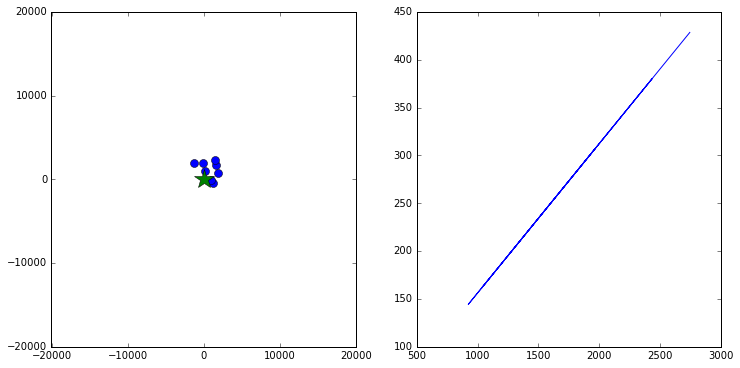

In [9]:
## Posição do evento

xtrue = 0.0
ytrue = 0.0
ztrue = 0.0
ttrue = 0.0

## Coordenada das estações

x = (np.random.rand(N) - 0.5) * 5000.
y = (np.random.rand(N) - 0.5) * 5000.
z = (np.random.rand(N)) * 0.0

d,t = tt(x, y, z, xtrue, ytrue, ztrue, ttrue)

## Mapa das estações e evento

_ = plt.subplot(1,2,1)
_ = plt.plot(x, y, "ob", markersize=8)
_ = plt.plot(xtrue, ytrue, "*g", markersize=20)
_ = plt.xlim(-1 * np.pi*6371.0,np.pi*6371.0)
_ = plt.ylim(-1 * np.pi*6371.0,np.pi*6371.0)
_ = plt.subplot(1,2,2)
_ = plt.plot(d,t)

## Buscando o evento a patir de um ponto o próximo

In [6]:
xo = x[t.argmin()]
yo = y[t.argmin()]
zo = z[t.argmin()]
to = 0.0

rms    = None
oldrms = None

xsol = []
ysol = []
print(" i  ---X--- ---Y--- ---Z--- ---T---")
for i in range(100): # Realizando um total de 10 iterações
    # Calcula o resíduo
    r = t - tt(x, y, z, xo, yo, zo, to)[1]
    rms = r * r
    rms = np.sqrt(np.sum(rms)) / len(rms)

    # Reporta
    print("%03d %7.2f %7.2f %7.2f %7.2f %6.2f" % (i, xo, yo, zo, to,rms))
    xsol.append(xo)
    ysol.append(yo)

    if rms < CVG:
        print("             Problema convergiu")
        break

    if oldrms is not None and rms / 10 > oldrms:
        print("             Problema divergiu!")
        break

    oldrms = rms

    # Monta o sistema
    m = np.zeros((N, 4))

    m[:,0] = ttdx(x,y,z,xo,yo,zo)
    m[:,1] = ttdy(x,y,z,xo,yo,zo)
    m[:,2] = ttdz(x,y,z,xo,yo,zo)
    m[:,3] = 1 # DT/Dt = 1
    
    # Resolve e atualiza
    tmp = np.linalg.lstsq(m,r)
    (dx,dy,dz,dt) = tmp[0]
    xo += dx
    yo += dy
    zo += dz
    to += dt


 i  ---X--- ---Y--- ---Z--- ---T---
000  199.97  622.33    0.00    0.00  27.57
001   84.17 -180.18    0.00   32.41  12.11
002    2.73   -4.74    0.00    1.21   0.41
003    0.00   -0.01    0.00    0.00   0.00
             Problema convergiu


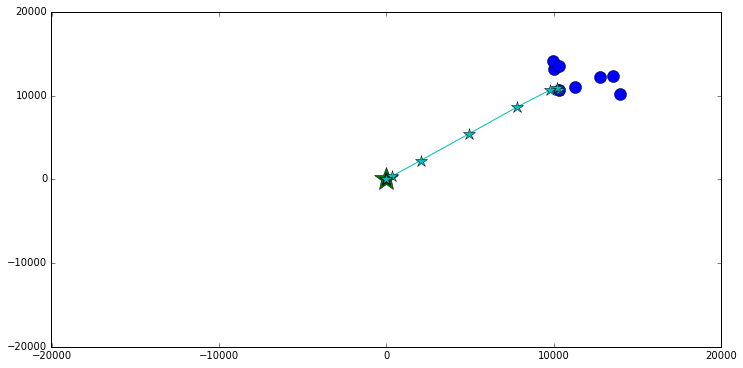

In [81]:
_ = plt.plot(x, y, "ob", markersize = 12)
_ = plt.xlim(-1 * np.pi*6371.0,np.pi*6371.0)
_ = plt.ylim(-1 * np.pi*6371.0,np.pi*6371.0)
_ = plt.plot(xtrue, ytrue, "*g", markersize = 25)
_ = plt.plot(xo, yo, "-k*", markersize=15)
_ = plt.plot(xsol, ysol, "-c*", markersize=13)
plt.show()

# Resolvendo de forma interativa

In [77]:
def call(xo = xo, yo = yo, zo = zo, to = to):
    d = compute_rms(x, y, z, t, xo, yo, zo, to)
    _ = plt.plot(x, y, "ob", markersize = 12)
    _ = plt.xlim(-1 * np.pi*6371.0,np.pi*6371.0)
    _ = plt.ylim(-1 * np.pi*6371.0,np.pi*6371.0)
    #_ = plt.plot(xtrue, ytrue, "*g", markersize = 25)
    _ = plt.plot(xo, yo, "-k*", markersize=15)
    _ = plt.text(-1*np.pi*6371.0+3000, np.pi*6371.0 -3000,"RMS = %.1f s" % d)
    return

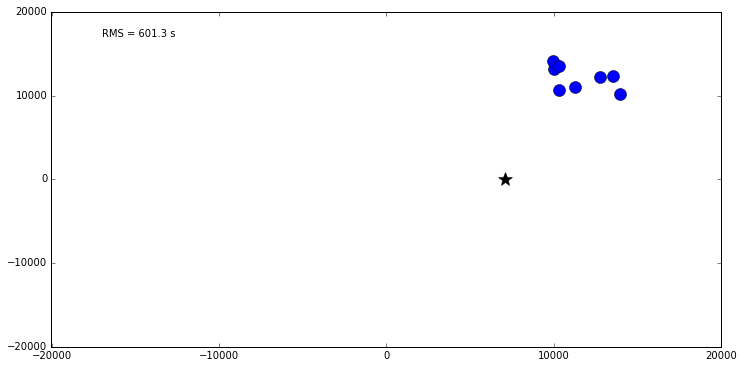

In [80]:
xo_widget = ipywidgets.FloatSlider(min=-1*np.pi*6371, max=np.pi*6371, step=1, continuous_update=False)
yo_widget = ipywidgets.FloatSlider(min=-1*np.pi*6371, max=np.pi*6371, step=1, continuous_update=False)
zo_widget = ipywidgets.FloatSlider(min=0, max=900, step=1, continuous_update=False)
to_widget = ipywidgets.FloatSlider(min=-1200, max=1200, step=1, continuous_update=False)

w = ipywidgets.interact(call, xo=xo_widget, yo = yo_widget, zo=zo_widget, to= to_widget)